# MACHINE LEARNING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

# Chargement du dataset
df = pd.read_csv("MentalHealth_clean_01.csv")

# Vérification rapide
print("Dimensions du dataset :", df.shape)
df.head()

Dimensions du dataset : (290051, 10)


,Gender,Country,Continent,Occupation,self_employed,family_history,treatment,Growing_Stress,Mental_Health_History,care_options
0,Female,United States,North America,Corporate,No,No,Yes,Yes,Yes,Not sure
1,Female,United States,North America,Corporate,No,Yes,Yes,Yes,Yes,No
2,Female,United States,North America,Corporate,No,Yes,Yes,Yes,Yes,Yes
3,Female,United States,North America,Corporate,No,Yes,Yes,Yes,Yes,Yes
4,Female,United States,North America,Corporate,No,Yes,Yes,Yes,Yes,Yes


In [2]:
# Encodage
df = pd.get_dummies(df, columns=['Gender', 'Continent', 'Occupation'], prefix=['Gender', 'Continent', 'Occupation'], dtype=int)

# Conversion manuelle des colonnes Oui/Non en 1/0
df['Family_History_bool'] = df['family_history'].map({'Yes': 1, 'No': 0})
df['Treatment_bool'] = df['treatment'].map({'Yes': 1, 'No': 0})

# Historique de santé mentale
df['Mental_Health_History_bool'] = df['Mental_Health_History'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Care_Options_bool'] = df['care_options'].apply(lambda x: 1 if x == 'Yes' else 0)

# Ne garder que les colonnes utiles pour le modèle, dans le bon ordre

expected_columns = [
    'Gender_Female', 'Gender_Male',
    'Continent_Africa', 'Continent_Asia', 'Continent_Europe', 
    'Continent_North America', 'Continent_Oceania', 'Continent_South America',
    'Occupation_Business', 'Occupation_Corporate', 'Occupation_Housewife', 
    'Occupation_Others', 'Occupation_Student',
    'Mental_Health_History_bool', 'Treatment_bool', 'Family_History_bool', 'Care_Options_bool'
]

for col in expected_columns:
    if col not in df.columns:
        df[col] = 0

df = df[expected_columns]

# Vérification
print("Nouvelles dimensions :", df.shape)
df.head()

Nouvelles dimensions : (290051, 17)


,Gender_Female,Gender_Male,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Occupation_Business,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,Mental_Health_History_bool,Treatment_bool,Family_History_bool,Care_Options_bool
0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0
1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0
2,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1
3,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1
4,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1


In [3]:
# Définition des X (features) et y (target)

# Je prends tout le monde sauf la target et les colonnes inutiles
features_to_drop = ["Treatment_bool"] 

# X contient toutes les colonnes sauf la target et le doublon
X = df.drop(features_to_drop, axis=1)

# y est notre cible
y = df["Treatment_bool"]

print("Colonnes utilisées pour le ML :")
print(X.columns.tolist())

Colonnes utilisées pour le ML :
['Gender_Female', 'Gender_Male', 'Continent_Africa', 'Continent_Asia', 'Continent_Europe', 'Continent_North America', 'Continent_Oceania', 'Continent_South America', 'Occupation_Business', 'Occupation_Corporate', 'Occupation_Housewife', 'Occupation_Others', 'Occupation_Student', 'Mental_Health_History_bool', 'Family_History_bool', 'Care_Options_bool']


In [4]:
# Division du dataset
print("Splitting dataset into train set and test set...")

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

print("...Done.")
print("Taille du X_train :", X_train.shape)
print("Taille du X_test :", X_test.shape)

Splitting dataset into train set and test set...
...Done.
Taille du X_train : (232040, 16)
Taille du X_test : (58011, 16)


In [5]:
# Entraînement du modèle
print("Training model...")

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

print("...Done.")

Training model...
...Done.


--- Assessment of performances ---
Accuracy-score on train set : 70.97%


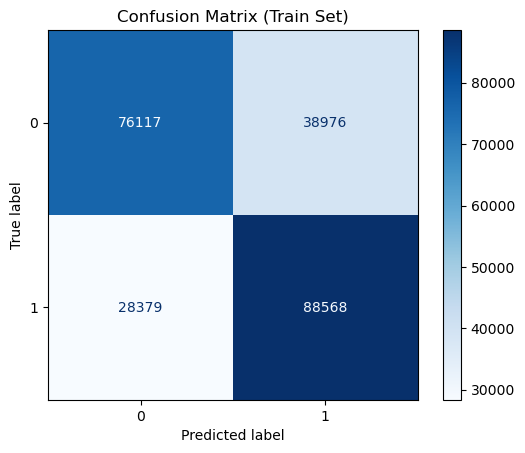

------------------------------
Accuracy-score on test set : 70.72%


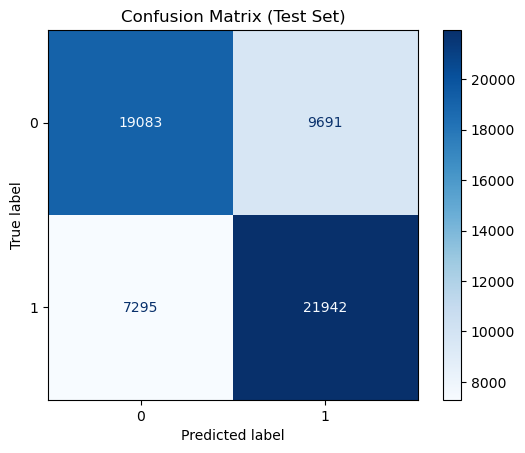

In [6]:
print("--- Assessment of performances ---")

# Score sur le Train set
train_score = classifier.score(X_train, y_train)
print(f"Accuracy-score on train set : {train_score:.2%}")

# Affichage de la matrice de confusion (Train)
ConfusionMatrixDisplay.from_estimator(classifier, X_train, y_train, cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Train Set)")
plt.show()

print("-" * 30)

# Score sur le Test set
test_score = classifier.score(X_test, y_test)
print(f"Accuracy-score on test set : {test_score:.2%}")

# Affichage de la matrice de confusion (Test)
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Test Set)")
plt.show()

In [7]:
## Analyse de la performance du model 

# Le modèle atteint une accuracy de 70.97% sur le train set et 70.72% sur le test set.

# L’écart très faible entre les performances train et test indique :
#  - une bonne capacité de généralisation
#  - l’absence d’overfitting notable
#  - un modèle stable et robuste compte tenu de la nature du problème

## Interpretation des matrices de confusion

# La matrice de confusion montre une capacité équilibrée du modèle à identifier :
#  - les individus ayant suivi un traitement (classe 1),
#  - ceux n’ayant jamais suivi de traitement (classe 0)

# On observe néanmoins :
#  - un nombre non négligeable de faux négatifs (personnes ayant suivi un traitement mais prédites comme non traitées)
#  - ainsi que des faux positifs (personnes prédites comme traitées alors qu’elles ne l’ont pas été)

# Dans le cadre de la mission de l’association Mosaïque Mentale, ce compromis est acceptable.
# Le modèle n’est pas un outil de diagnostic mais un outil de ciblage et de priorisation pour des campagnes de prévention.

Top 15 des facteurs influençant la prédiction :
                         Coefficient
Family_History_bool         1.427597
Care_Options_bool           1.203815
Continent_Asia             -0.976791
Continent_South America    -0.848622
Continent_Oceania           0.761564
Gender_Male                -0.588640
Continent_North America     0.229422
Continent_Europe            0.206221
Occupation_Student         -0.109258
Occupation_Housewife       -0.107872
Occupation_Others          -0.106489
Occupation_Corporate       -0.102894
Occupation_Business        -0.102270
Continent_Africa            0.099424
Gender_Female               0.059857


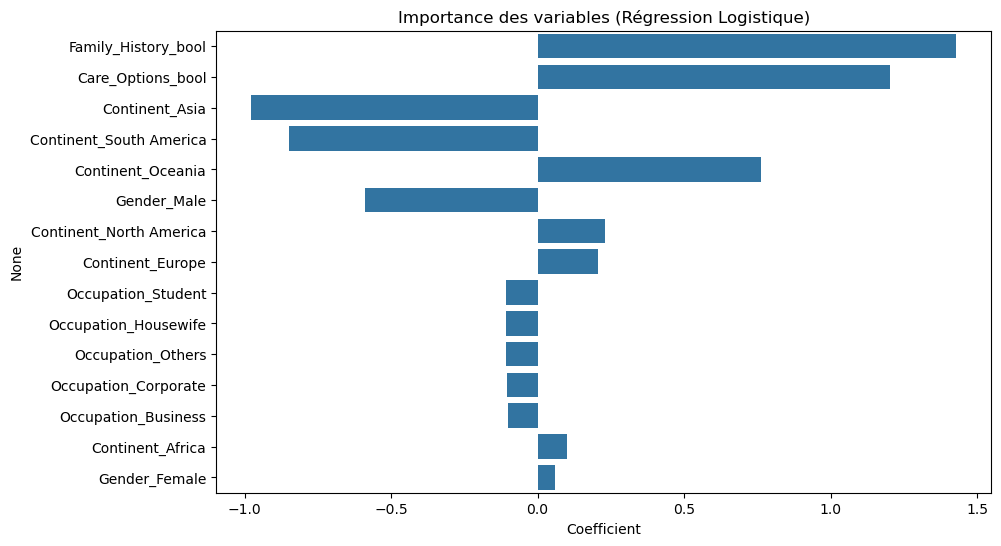

In [8]:
# Création d'un DataFrame pour visualiser les coefficients
coefs = pd.DataFrame(
    index=X.columns,
    data=classifier.coef_[0],
    columns=['Coefficient']
)

# Je trie pour voir les plus importants en premier
coefs['Abs_Coefficient'] = coefs['Coefficient'].abs()
coefs = coefs.sort_values(by='Abs_Coefficient', ascending=False)

# J'affiche le top 15 des facteurs les plus influents
print("Top 15 des facteurs influençant la prédiction :")
print(coefs[['Coefficient']].head(15))

# Visualisation rapide
plt.figure(figsize=(10, 6))
sns.barplot(x=coefs['Coefficient'].head(15), y=coefs.index[:15])
plt.title("Importance des variables (Régression Logistique)")
plt.show()

In [9]:
## Interpretation des features importance

# Le modèle s’appuie principalement sur des facteurs structurels et sociaux, plutôt que sur des indicateurs cliniques directs.

# Antécédents familiaux :
  # - Facteur le plus influent du modèle.
  # - La présence d’un historique familial augmente fortement la probabilité d’avoir déjà suivi un traitement.
  # - La normalisation du soin dans l’entourage est un déclencheur clé du recours aux soins.

# Connaissance des options de soins :
  # - Deuxième levier le plus important.
  # - Les individus informés consultent beaucoup plus souvent.
  # - L’accès à l’information apparaît comme un levier central de prévention.

# Genre :
  # - Le genre masculin est négativement associé au recours au traitement.
  # - Résultat cohérent avec la littérature : stigmatisation, normes sociales, sous-recours aux soins chez les hommes.

# Géographie :
  # - Effet positif pour l’Océanie et l’Amérique du Nord.
  # - Effet négatif marqué pour l’Asie et l’Amérique du Sud.
  # - Ces coefficients reflètent principalement des différences d’accès aux soins et de normes culturelles.

# Statut professionnel :
  # - Coefficients faibles et proches.
  # - Facteur secondaire, peu discriminant dans ce dataset.

# Globalement, le modèle montre que le recours au traitement est davantage lié à:
  # - l’environnement social, culturel et informationnel
  # - qu’au stress ou à la vulnérabilité psychique déclarée seule.

In [10]:
## Recommandations pour la campagne de prévention

# La problématique du projet est la suivante :
# Compte tenu de ses caractéristiques, une personne a-t-elle une probabilité plus élevée que la moyenne d’avoir déjà suivi un traitement pour un problème de santé mentale ?

# Le modèle de machine learning sert à estimer une probabilité de recours au soin, à partir de facteurs socio-démographiques, culturels et informationnels.

# Concrètement, le modèle permet de :
  # - identifier des profils à risque de non-recours aux soins
  # - mettre en évidence les facteurs explicatifs majeurs du passage au traitement
  # - prioriser le ciblage d’une campagne de prévention pour l’association Mosaïque Mentale 

# Le non-recours aux soins n’est pas principalement lié à l’absence de souffrance, mais à des freins culturels, informationnels et sociaux.

# Recentrer la campagne :
  # - moins sur le stress ressenti
  # - plus sur le passage à l’action (quand, comment, pourquoi consulter)

# Prioriser l’information sur les options de soins :
  # - types de professionnels
  # - accessibilité
  # - premières démarches concrètes

# Cibler spécifiquement les populations à risque de non-recours :
  # - hommes
  # - personnes sans antécédents familiaux
  # - contextes culturels où le soin est peu normalisé

# Adapter les messages au contexte géographique et culturel, plutôt que diffuser une campagne uniforme.

# Utiliser le modèle comme outil de priorisation stratégique :
  # - segmentation des publics
  # - allocation des ressources
  # - test de messages de prévention

# Le modèle soutient une stratégie de prévention basée sur la réduction des freins au soin plutôt que sur l’intensité de la souffrance perçue.


In [11]:
# Comparison with Random Forest
from sklearn.ensemble import RandomForestClassifier

print("Training Random Forest...")

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

print("...Done.")

Training Random Forest...
...Done.


--- Assessment of performances ---
Accuracy-score on train set : 71.27%
Accuracy-score on test set : 71.01%


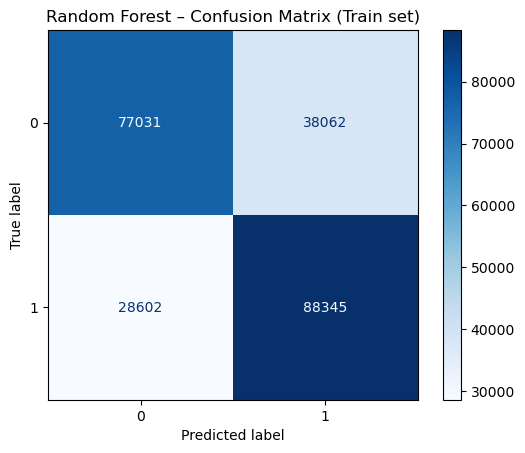

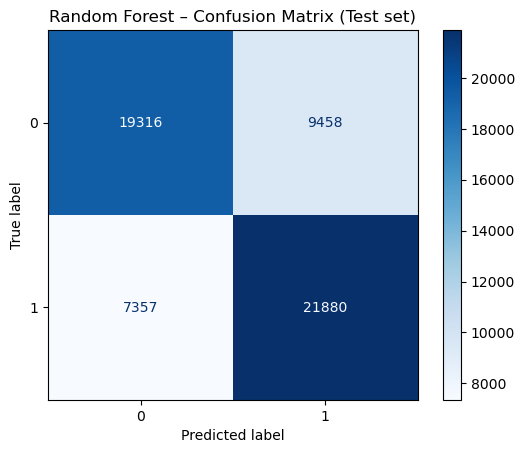

In [12]:
# Assessment of performances

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("--- Assessment of performances ---")

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print(f"Accuracy-score on train set : {rf_model.score(X_train, y_train):.2%}")
print(f"Accuracy-score on test set : {rf_model.score(X_test, y_test):.2%}")

# Affichage de la matrice de confusion (Train)
ConfusionMatrixDisplay.from_predictions(
    y_train,
    y_train_pred,
    cmap=plt.cm.Blues
)
plt.title("Random Forest – Confusion Matrix (Train set)")
plt.show()

# Affichage de la matrice de confusion (Test)
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_pred,
    cmap=plt.cm.Blues
)
plt.title("Random Forest – Confusion Matrix (Test set)")
plt.show()

In [13]:
## Comparaison Random Forest vs Régression Logistique

# Accuracy Random Forest ≈ 71 % (train et test) ; similaire à la logistic regression

# Comparé à la régression logistique :
 # - meilleure détection globale des personnes ayant suivi un traitement
 # - réduction des faux négatifs → moins de profils à risque manqués
 # - augmentation modérée des faux positifs